## Pon Pandian,Sekar,Karthikeyan,Anthoni Thomas

## • Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns

## • Reading the dataset

In [2]:
dt=pd.read_csv("dataset_website.csv")
dt.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


## • Analyze the data

In [3]:
# There is no need for index. So we drop the index column
dt.drop('index',axis=1,inplace=True)
dt.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
# Descriptive statistics on the dataset
dt.describe()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

## • Handling null values

In [6]:
# To check any null values
dt.isnull().any()

having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
Page_Rank                      False
G

In [7]:
# To check the count of null values
dt.isnull().sum()

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

## • Data visualization

## (i) Univarient Analysis

<AxesSubplot:xlabel='Request_URL', ylabel='Count'>

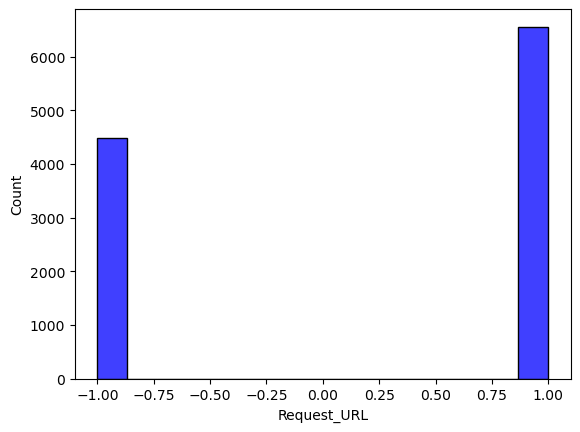

In [8]:
# Choosing the Request_URL column
sns.histplot(x=dt["Request_URL"],color='Blue')  

## (ii) Bi-Variate Analysis

<AxesSubplot:xlabel='Redirect', ylabel='RightClick'>

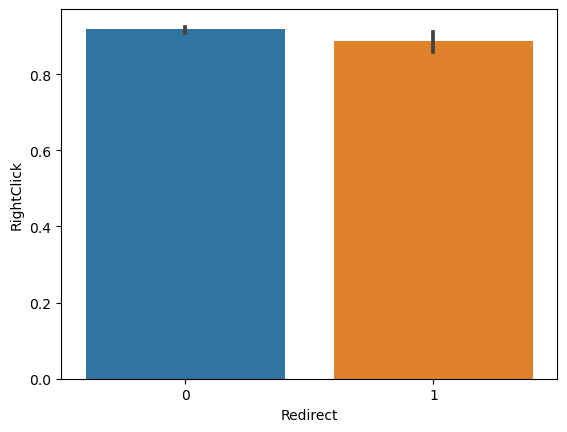

In [9]:
# Choosing Redirect and RightClick column
sns.barplot(x=dt["Redirect"],y=dt["RightClick"])

## (iii) Multi-Variate Analysis

In [10]:
sns.pairplot(dt)

## • Find the outliers and replace them outliers 

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='having_IPhaving_IP_Address'>

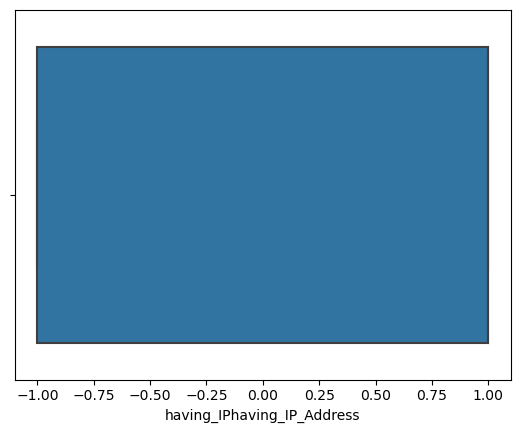

In [11]:
sns.boxplot(dt["having_IPhaving_IP_Address"])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='URLURL_Length'>

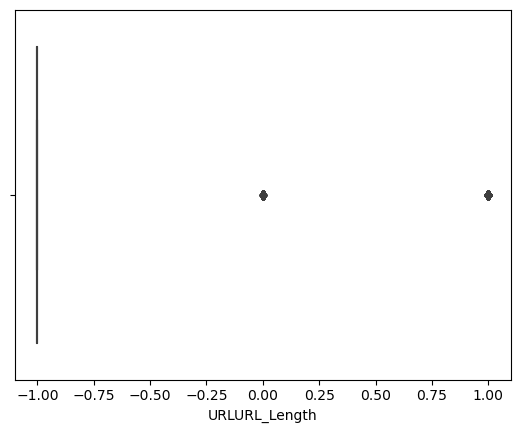

In [12]:
sns.boxplot(dt["URLURL_Length"])

In [13]:
dt['URLURL_Length'].median()

-1.0

<AxesSubplot:xlabel='URLURL_Length'>

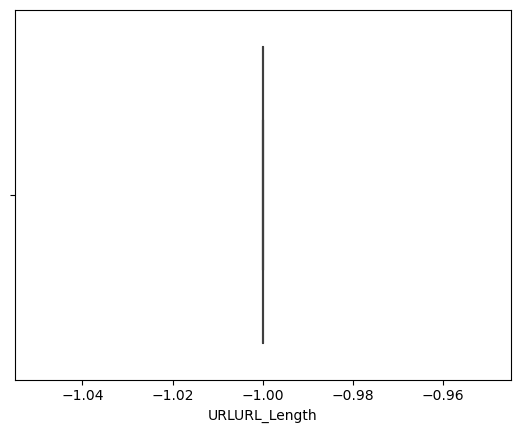

In [14]:
# Replacement using median
q1=dt['URLURL_Length'].quantile(0.25)  # (Q1)           
q3=dt['URLURL_Length'].quantile(0.75)  # (Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['URLURL_Length']= np.where(dt['URLURL_Length']>upper_limit,-1.0,dt['URLURL_Length'])
sns.boxplot(x=dt['URLURL_Length'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shortining_Service'>

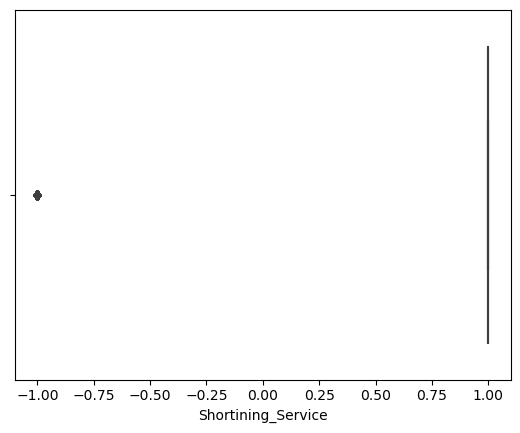

In [15]:
sns.boxplot(dt['Shortining_Service'])

In [16]:
dt['Shortining_Service'].median()

1.0

<AxesSubplot:xlabel='Shortining_Service'>

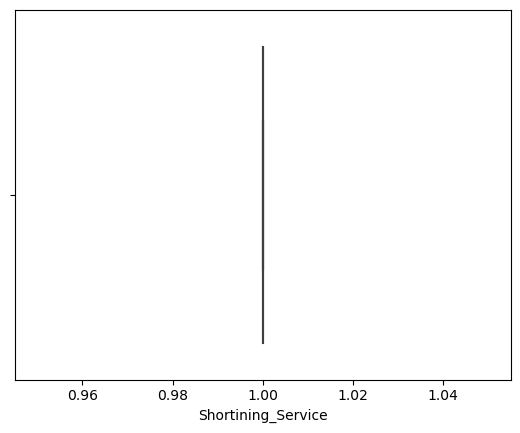

In [17]:
# Replacement using median
q1=dt['Shortining_Service'].quantile(0.25)  # (Q1)           
q3=dt['Shortining_Service'].quantile(0.75)  # (Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['Shortining_Service']= np.where(dt['Shortining_Service']<lower_limit,1.0,dt['Shortining_Service'])
sns.boxplot(x=dt['Shortining_Service'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='having_At_Symbol'>

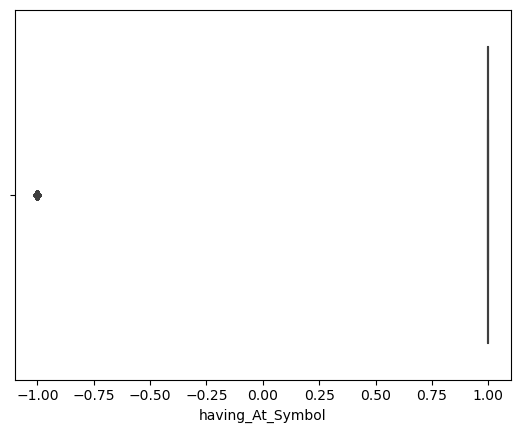

In [18]:
sns.boxplot(dt['having_At_Symbol'])

In [19]:
dt['having_At_Symbol'].median()

1.0

<AxesSubplot:xlabel='having_At_Symbol'>

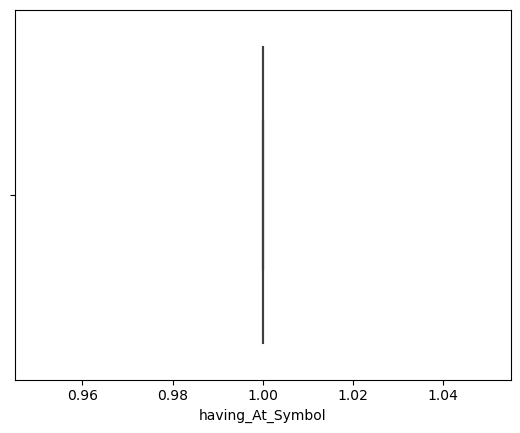

In [20]:
# Replacement using median
q1=dt['having_At_Symbol'].quantile(0.25)  # (Q1)           
q3=dt['having_At_Symbol'].quantile(0.75)  # (Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['having_At_Symbol']= np.where(dt['having_At_Symbol']<lower_limit,1.0,dt['having_At_Symbol'])
sns.boxplot(x=dt['having_At_Symbol'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='double_slash_redirecting'>

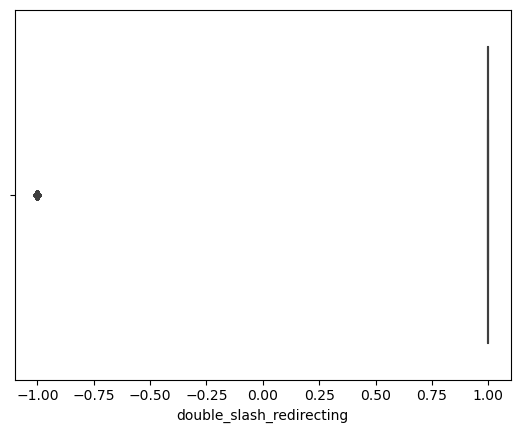

In [21]:
sns.boxplot(dt['double_slash_redirecting'])

In [22]:
dt['double_slash_redirecting'].median()

1.0

<AxesSubplot:xlabel='double_slash_redirecting'>

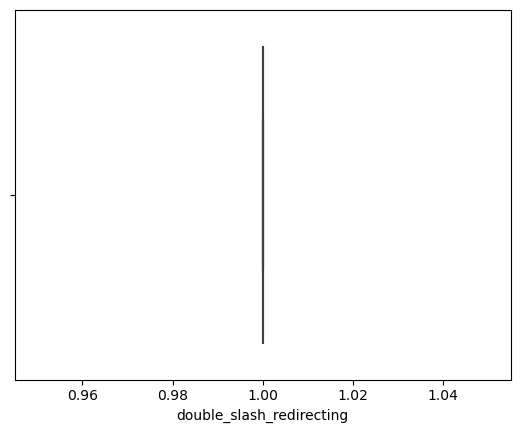

In [23]:
# Replacement using median
q1=dt['double_slash_redirecting'].quantile(0.25)  # (Q1)           
q3=dt['double_slash_redirecting'].quantile(0.75)  # (Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['double_slash_redirecting']= np.where(dt['double_slash_redirecting']<lower_limit,1.0,dt['double_slash_redirecting'])
sns.boxplot(x=dt['double_slash_redirecting'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Prefix_Suffix'>

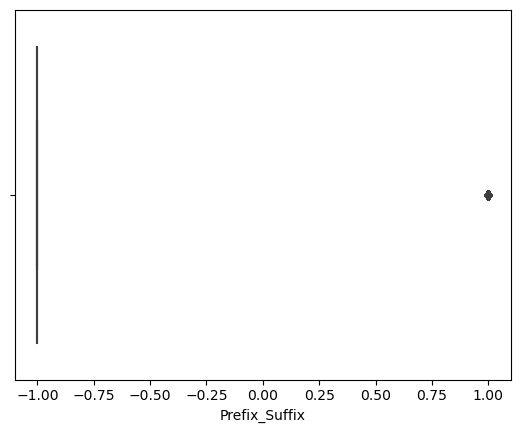

In [24]:
sns.boxplot(dt['Prefix_Suffix'])

In [25]:
dt['Prefix_Suffix'].median()

-1.0

<AxesSubplot:xlabel='Prefix_Suffix'>

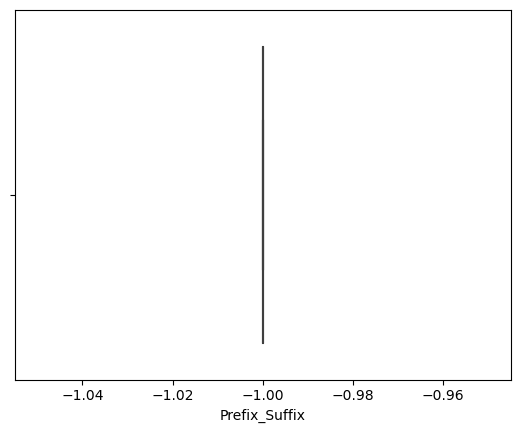

In [26]:
# Replacement using median
q1=dt['Prefix_Suffix'].quantile(0.25)  # (Q1)           
q3=dt['Prefix_Suffix'].quantile(0.75)  # (Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['Prefix_Suffix']= np.where(dt['Prefix_Suffix']>upper_limit,-1.0,dt['Prefix_Suffix'])
sns.boxplot(x=dt['Prefix_Suffix'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='having_Sub_Domain'>

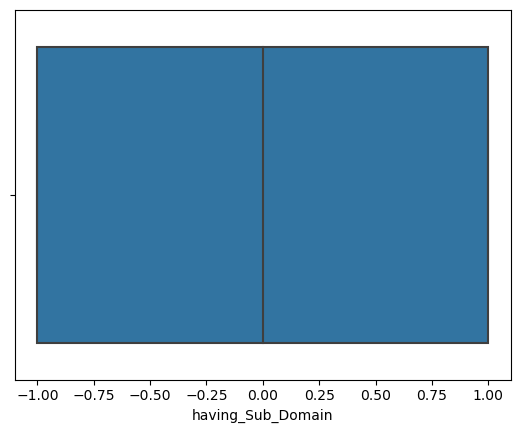

In [27]:
sns.boxplot(dt['having_Sub_Domain'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SSLfinal_State'>

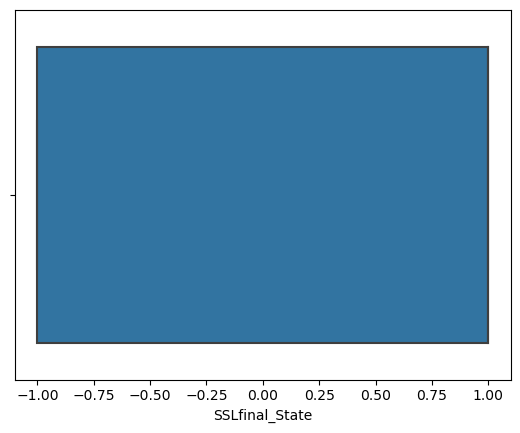

In [28]:
sns.boxplot(dt['SSLfinal_State'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Domain_registeration_length'>

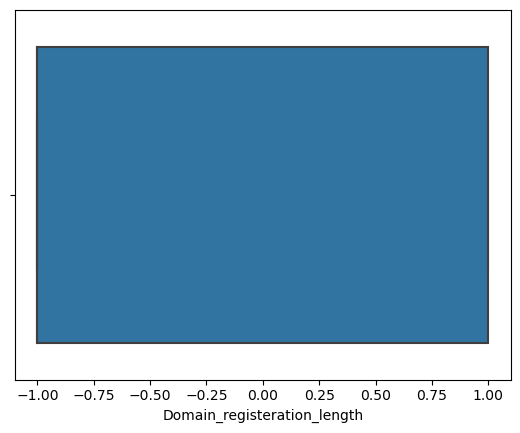

In [29]:
sns.boxplot(dt['Domain_registeration_length'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Favicon'>

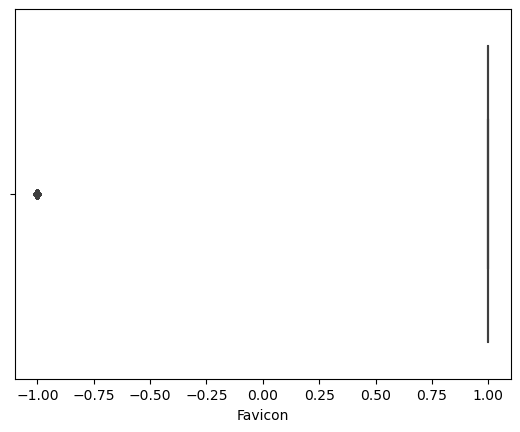

In [30]:
sns.boxplot(dt['Favicon'])

In [31]:
dt['Favicon'].median()

1.0

<AxesSubplot:xlabel='Favicon'>

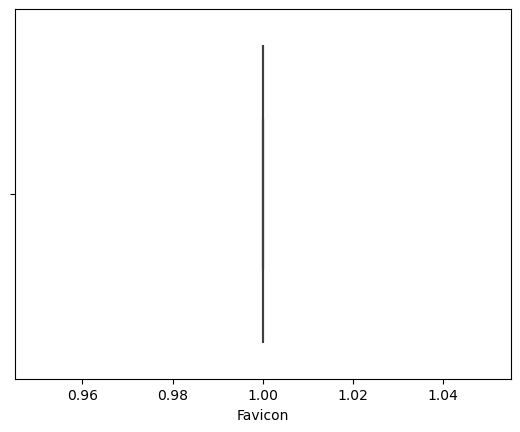

In [32]:
# Replacement using median
q1=dt['Favicon'].quantile(0.25)  # (Q1)           
q3=dt['Favicon'].quantile(0.75)  # (Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['Favicon']= np.where(dt['Favicon']<lower_limit,1.0,dt['Favicon'])
sns.boxplot(x=dt['Favicon'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='port'>

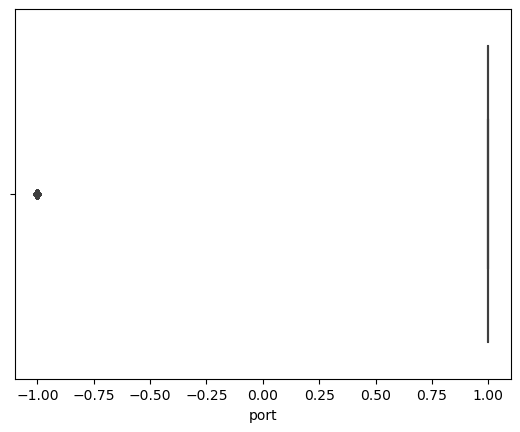

In [33]:
sns.boxplot(dt['port'])

In [34]:
dt['port'].median()

1.0

<AxesSubplot:xlabel='port'>

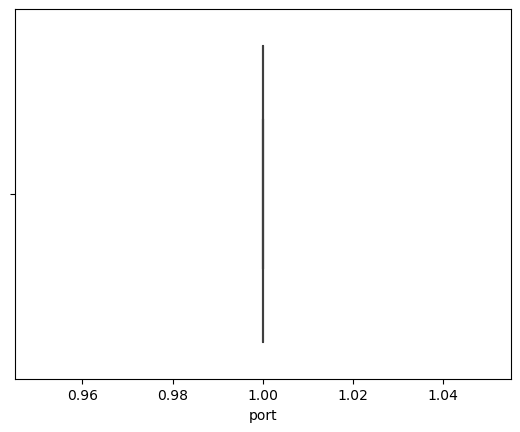

In [35]:
# Replacement using median
q1=dt['port'].quantile(0.25)  #(Q1)           
q3=dt['port'].quantile(0.75)  #(Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['port']= np.where(dt['port']<lower_limit,1.0,dt['port'])
sns.boxplot(x=dt['port'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HTTPS_token'>

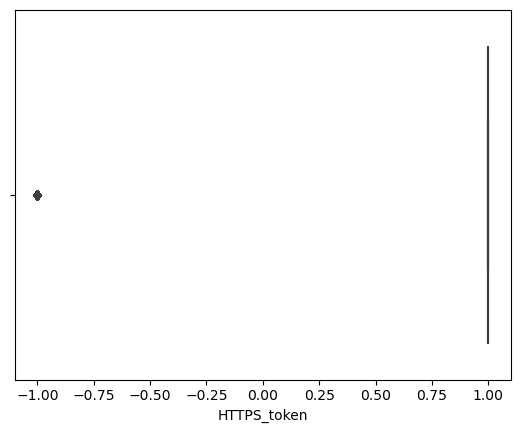

In [36]:
sns.boxplot(dt['HTTPS_token'])

In [37]:
dt['HTTPS_token'].median()

1.0

<AxesSubplot:xlabel='HTTPS_token'>

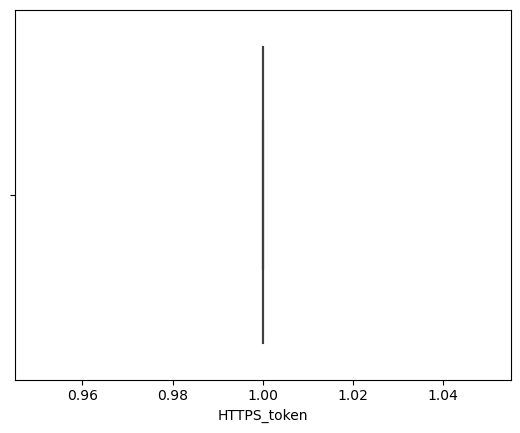

In [38]:
# Replacement using median
q1=dt['HTTPS_token'].quantile(0.25)  # (Q1)           
q3=dt['HTTPS_token'].quantile(0.75)  # (Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['HTTPS_token']= np.where(dt['HTTPS_token']<lower_limit,1.0,dt['HTTPS_token'])
sns.boxplot(x=dt['HTTPS_token'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Request_URL'>

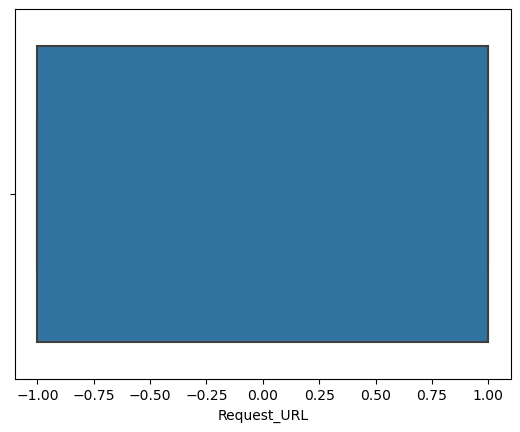

In [39]:
sns.boxplot(dt['Request_URL'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='URL_of_Anchor'>

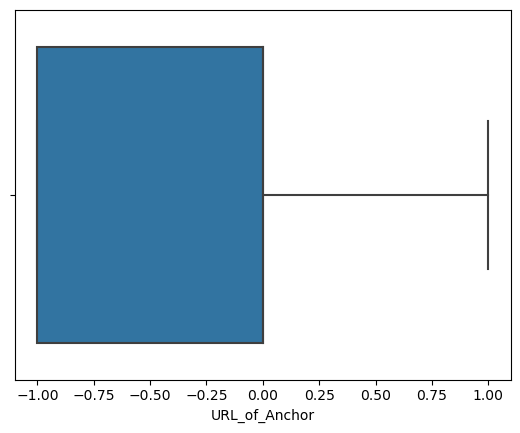

In [40]:
sns.boxplot(dt['URL_of_Anchor'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Links_in_tags'>

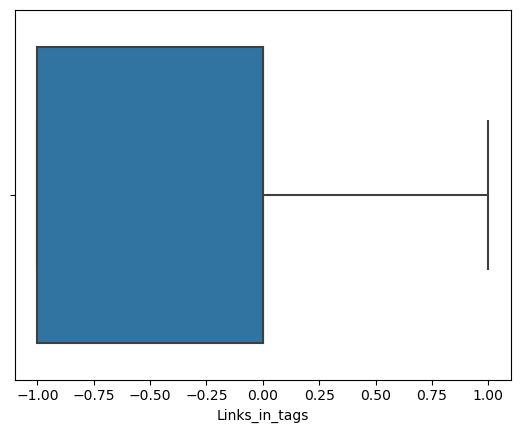

In [41]:
sns.boxplot(dt['Links_in_tags'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SFH'>

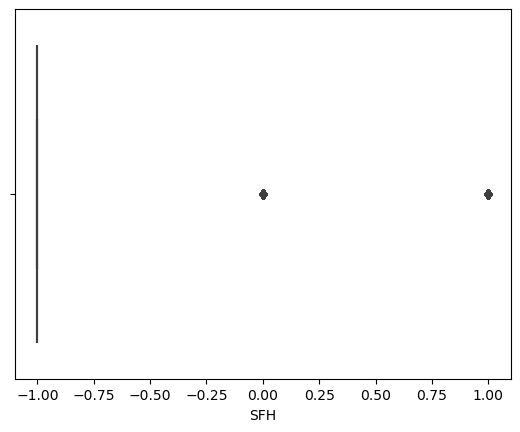

In [42]:
sns.boxplot(dt['SFH'])

In [43]:
dt['SFH'].median()

-1.0

<AxesSubplot:xlabel='SFH'>

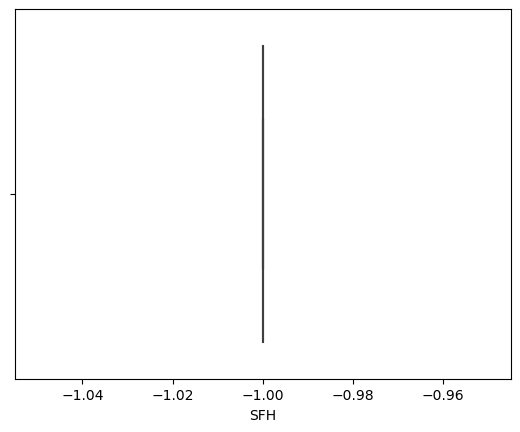

In [44]:
# Replacement using median
q1=dt['SFH'].quantile(0.25)  # (Q1)           
q3=dt['SFH'].quantile(0.75)  # (Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['SFH']= np.where(dt['SFH']>upper_limit,-1.0,dt['SFH'])
sns.boxplot(x=dt['SFH'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Submitting_to_email'>

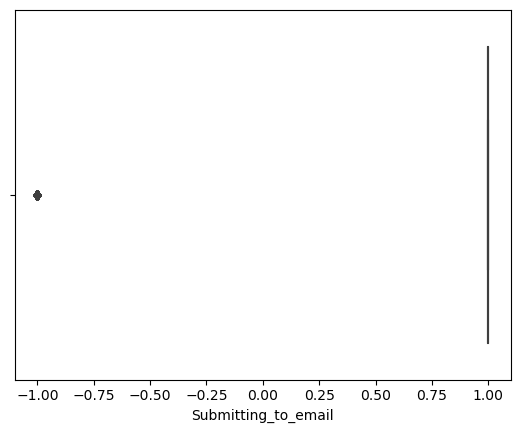

In [45]:
sns.boxplot(dt['Submitting_to_email'])

In [46]:
dt['Submitting_to_email'].median()

1.0

<AxesSubplot:xlabel='Submitting_to_email'>

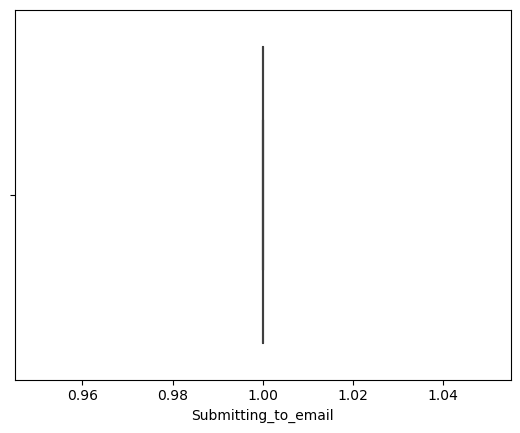

In [47]:
# Replacement using median
q1=dt['Submitting_to_email'].quantile(0.25)  # (Q1)           
q3=dt['Submitting_to_email'].quantile(0.75)  # (Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['Submitting_to_email']= np.where(dt['Submitting_to_email']<lower_limit,1.0,dt['Submitting_to_email'])
sns.boxplot(x=dt['Submitting_to_email'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Abnormal_URL'>

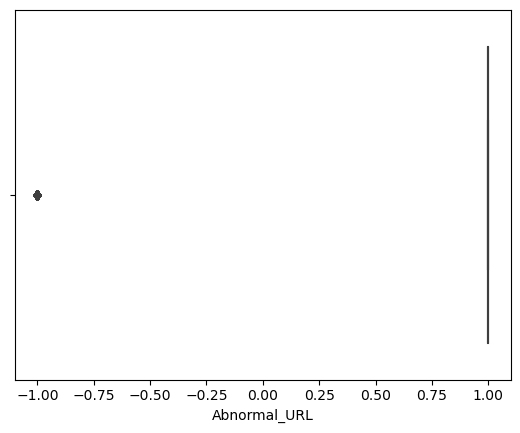

In [48]:
sns.boxplot(dt['Abnormal_URL'])

In [49]:
dt['Abnormal_URL'].median()

1.0

<AxesSubplot:xlabel='Abnormal_URL'>

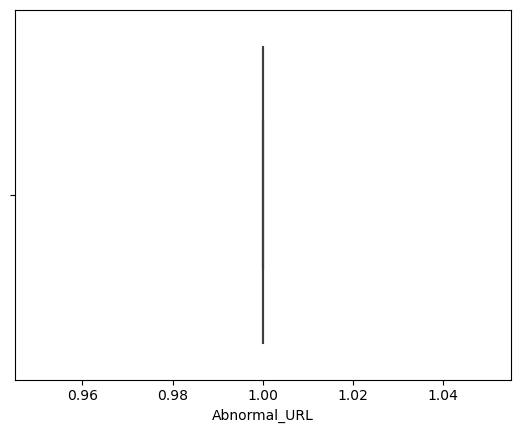

In [50]:
# Replacement using median
q1=dt['Abnormal_URL'].quantile(0.25)  # (Q1)           
q3=dt['Abnormal_URL'].quantile(0.75)  # (Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['Abnormal_URL']= np.where(dt['Abnormal_URL']<lower_limit,1.0,dt['Abnormal_URL'])
sns.boxplot(x=dt['Abnormal_URL'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Redirect'>

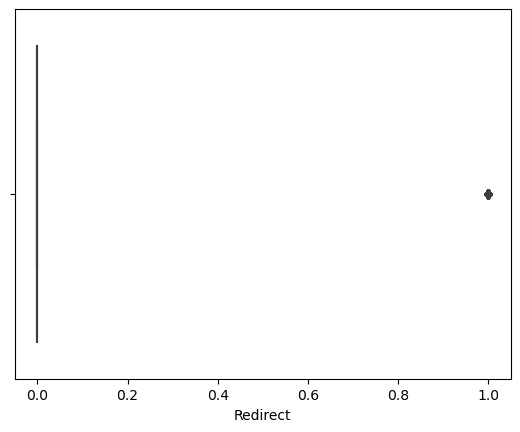

In [51]:
sns.boxplot(dt['Redirect'])

In [52]:
dt['Redirect'].median()

0.0

<AxesSubplot:xlabel='Redirect'>

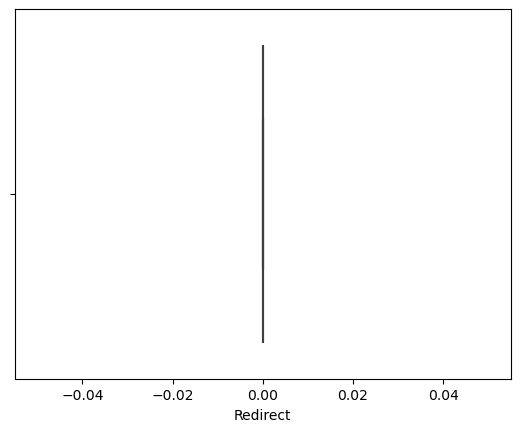

In [53]:
# Replacement using median
q1=dt['Redirect'].quantile(0.25)  # (Q1)           
q3=dt['Redirect'].quantile(0.75)  # (Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['Redirect']= np.where(dt['Redirect']>upper_limit,0.0,dt['Redirect'])
sns.boxplot(x=dt['Redirect'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='on_mouseover'>

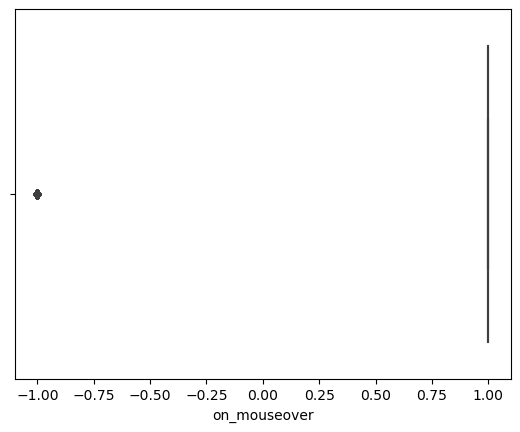

In [54]:
sns.boxplot(dt['on_mouseover'])

In [55]:
dt['on_mouseover'].median()

1.0

<AxesSubplot:xlabel='on_mouseover'>

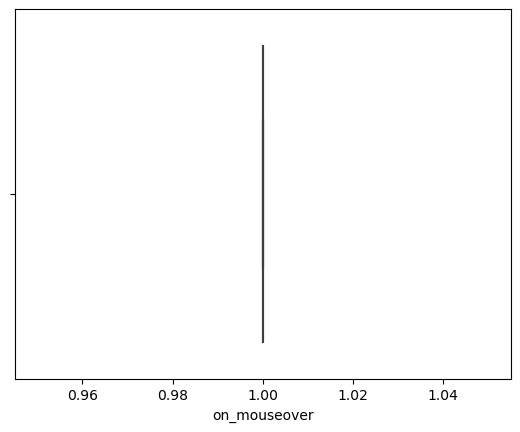

In [56]:
# Replacement using median
q1=dt['on_mouseover'].quantile(0.25)  # (Q1)           
q3=dt['on_mouseover'].quantile(0.75)  # (Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['on_mouseover']= np.where(dt['on_mouseover']<lower_limit,1.0,dt['on_mouseover'])
sns.boxplot(x=dt['on_mouseover'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RightClick'>

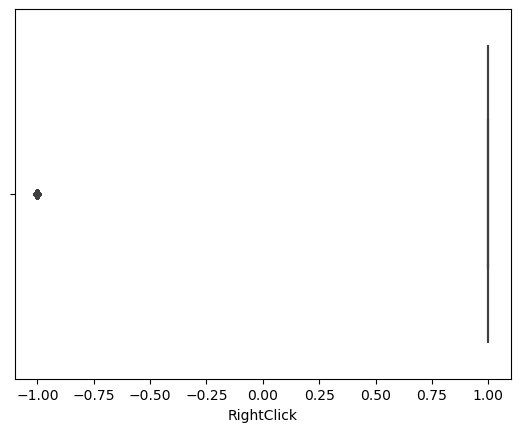

In [57]:
sns.boxplot(dt['RightClick'])

In [58]:
dt['RightClick'].median()

1.0

<AxesSubplot:xlabel='RightClick'>

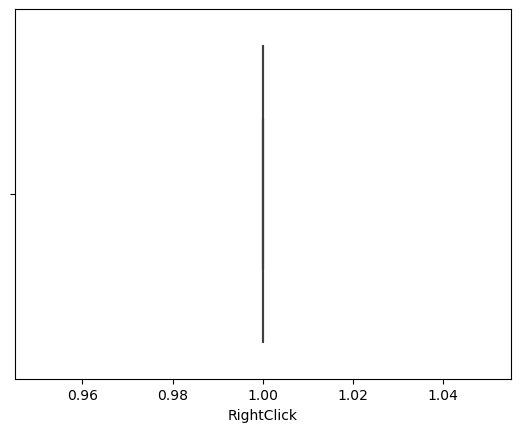

In [59]:
# Replacement using median
q1=dt['RightClick'].quantile(0.25)  # (Q1)           
q3=dt['RightClick'].quantile(0.75)  # (Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['RightClick']= np.where(dt['RightClick']<lower_limit,1.0,dt['RightClick'])
sns.boxplot(x=dt['RightClick'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='popUpWidnow'>

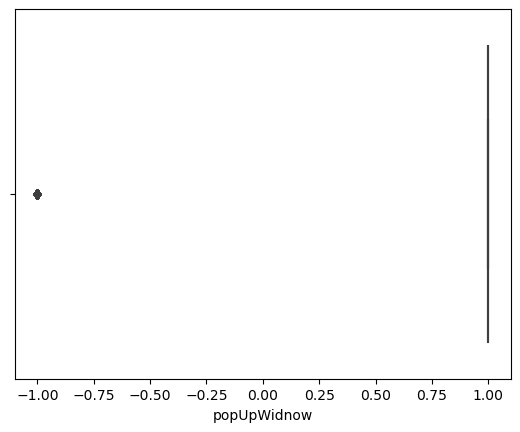

In [60]:
sns.boxplot(dt['popUpWidnow'])

In [61]:
dt['popUpWidnow'].median()

1.0

<AxesSubplot:xlabel='popUpWidnow'>

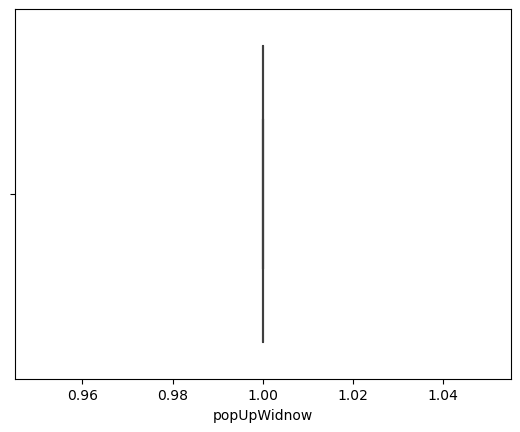

In [62]:
# Replacement using median
q1=dt['popUpWidnow'].quantile(0.25)  # (Q1)           
q3=dt['popUpWidnow'].quantile(0.75)  # (Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['popUpWidnow']= np.where(dt['popUpWidnow']<lower_limit,1.0,dt['popUpWidnow'])
sns.boxplot(x=dt['popUpWidnow'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Iframe'>

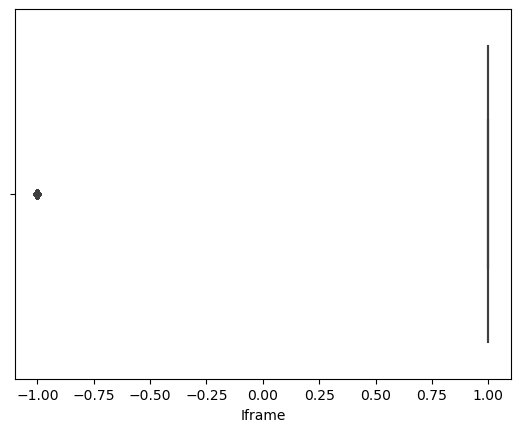

In [63]:
sns.boxplot(dt['Iframe'])

In [64]:
dt['Iframe'].median()

1.0

<AxesSubplot:xlabel='Iframe'>

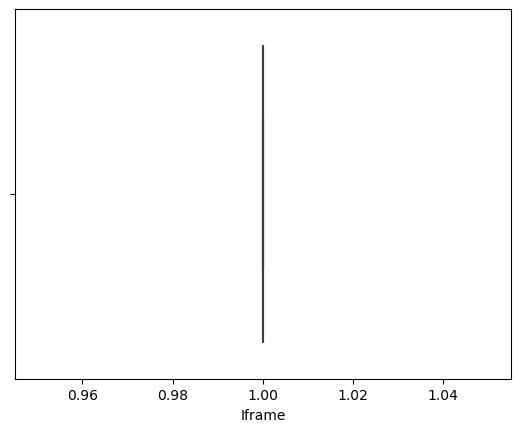

In [65]:
# Replacement using median
q1=dt['Iframe'].quantile(0.25)  # (Q1)           
q3=dt['Iframe'].quantile(0.75)  # (Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['Iframe']= np.where(dt['Iframe']<lower_limit,1.0,dt['Iframe'])
sns.boxplot(x=dt['Iframe'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_of_domain'>

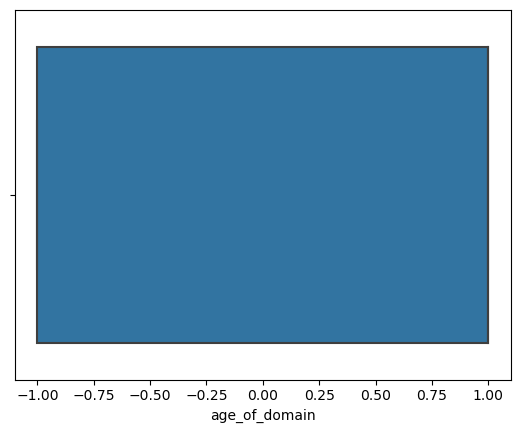

In [66]:
sns.boxplot(dt['age_of_domain'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DNSRecord'>

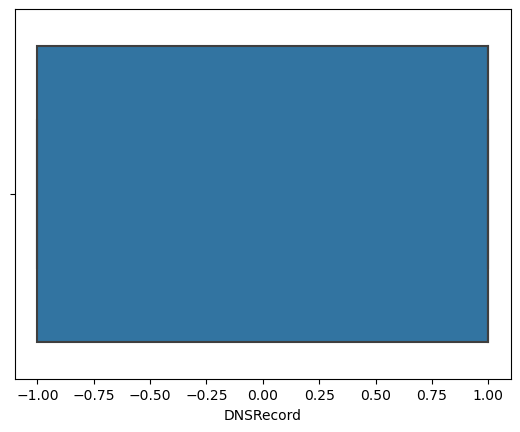

In [67]:
sns.boxplot(dt['DNSRecord'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='web_traffic'>

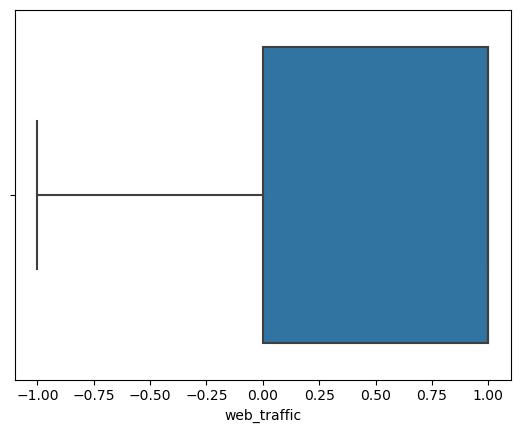

In [68]:
sns.boxplot(dt['web_traffic'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Page_Rank'>

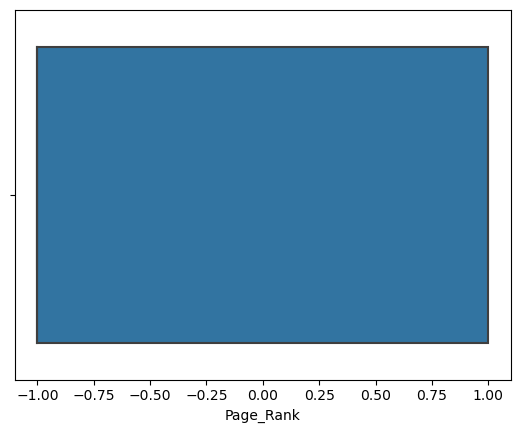

In [69]:
sns.boxplot(dt['Page_Rank'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Google_Index'>

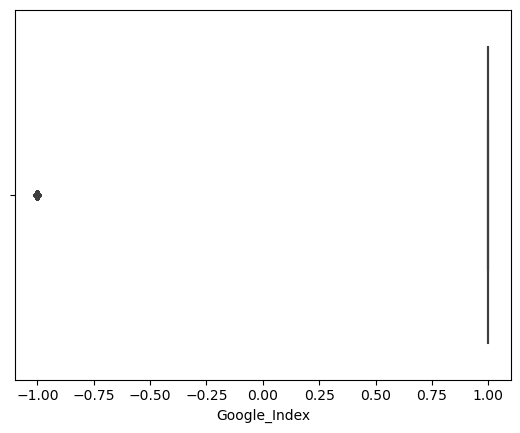

In [70]:
sns.boxplot(dt['Google_Index'])

In [71]:
dt['Google_Index'].median()

1.0

<AxesSubplot:xlabel='Google_Index'>

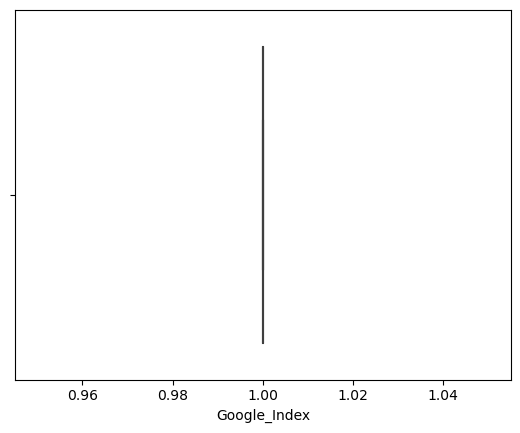

In [72]:
# Replacement using median
q1=dt['Google_Index'].quantile(0.25)  # (Q1)           
q3=dt['Google_Index'].quantile(0.75)  # (Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['Google_Index']= np.where(dt['Google_Index']<lower_limit,1.0,dt['Google_Index'])
sns.boxplot(x=dt['Google_Index'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Links_pointing_to_page'>

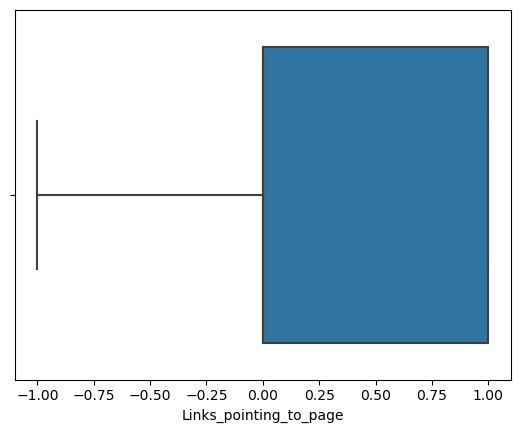

In [73]:
sns.boxplot(dt['Links_pointing_to_page'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Statistical_report'>

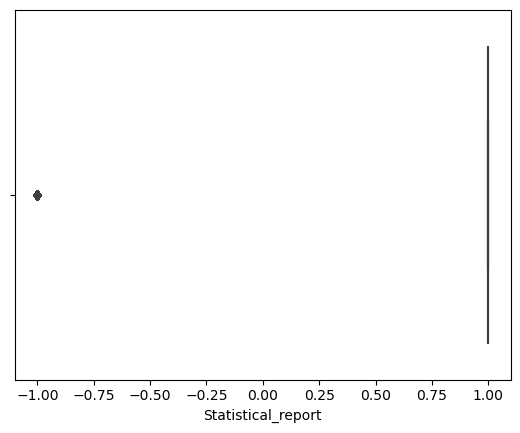

In [74]:
sns.boxplot(dt['Statistical_report'])

In [75]:
dt['Statistical_report'].median()

1.0

<AxesSubplot:xlabel='Statistical_report'>

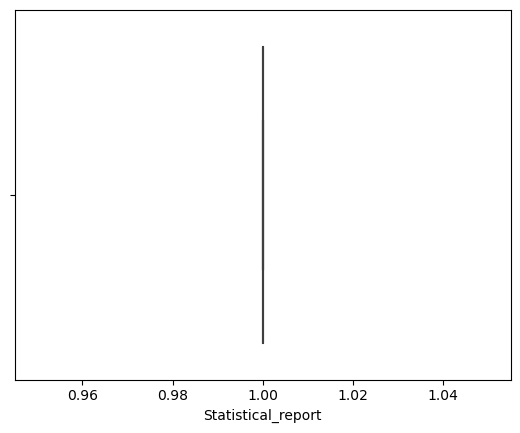

In [76]:
# Replacement using median
q1=dt['Statistical_report'].quantile(0.25)  # (Q1)           
q3=dt['Statistical_report'].quantile(0.75)  # (Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

dt['Statistical_report']= np.where(dt['Statistical_report']<lower_limit,1.0,dt['Statistical_report'])
sns.boxplot(x=dt['Statistical_report'],showfliers=False)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result'>

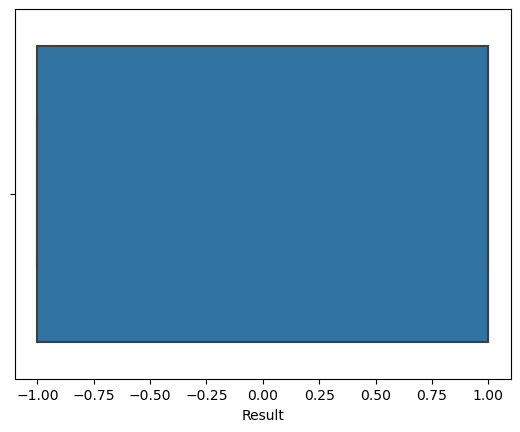

In [77]:
sns.boxplot(dt['Result'])

## • Splitting data into independent and dependent variables

In [78]:
# Splitting data as independent and dependent
x=dt.iloc[:,0:30] # Independent variable
y=dt.iloc[:,-1]   # Dependent variable
print(x,y)

       having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0                              -1           -1.0                 1.0   
1                               1           -1.0                 1.0   
2                               1           -1.0                 1.0   
3                               1           -1.0                 1.0   
4                               1           -1.0                 1.0   
...                           ...            ...                 ...   
11050                           1           -1.0                 1.0   
11051                          -1           -1.0                 1.0   
11052                           1           -1.0                 1.0   
11053                          -1           -1.0                 1.0   
11054                          -1           -1.0                 1.0   

       having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                   1.0                       1.0           -1.0   

In [79]:
x.shape

(11055, 30)

In [80]:
y.shape

(11055,)

## • Splitting data into train and test

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## • Model building

In [82]:
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i != y_test))

In [83]:
knn=KNeighborsClassifier(n_neighbors=1)
model_2= knn.fit(x_train,y_train)

In [84]:
knn_predict=model_2.predict(x_test)

## • Check the metrics of the model

In [85]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy Score: %f" %(accuracy_score(knn_predict,y_test)*100))
print("Recall Score : %f" %(recall_score(knn_predict,y_test)*100))
print("ROC Score : %f\n" %(roc_auc_score(knn_predict,y_test)*100))
print(confusion_matrix(knn_predict,y_test))


Accuracy Score: 93.848937
Recall Score : 93.025142
ROC Score : 93.956334

[[ 928   50]
 [  86 1147]]


## • Saving the model

In [86]:
import pickle
pickle.dump(knn,open('phishing_website.pkl','wb'))